# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# EDA (Exploratory Data Analysis)

In [2]:
base_dir = 'input'
class_labels = os.listdir(base_dir)
class_labels.sort()

print(class_labels,'\n\n')
print(f'Number of classes: {len(class_labels)}')

['Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___healthy', 'Grape___healthy', 'Peach___healthy', 'Pepper_bell___healthy', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy'] 


Number of classes: 10


In [3]:
chart_data = []
chart_labels = []

for label in class_labels:
    path = os.path.join(base_dir, label)
    size = len(os.listdir(path))
    label = label.split("_")[0]
    chart_labels.append(label)
    chart_data.append(size)
    print(f'Target name: {label:<10} | number of samples in data: {size}')

Target name: Apple      | number of samples in data: 1000
Target name: Blueberry  | number of samples in data: 1000
Target name: Cherry     | number of samples in data: 1000
Target name: Corn       | number of samples in data: 1000
Target name: Grape      | number of samples in data: 1000
Target name: Peach      | number of samples in data: 1000
Target name: Pepper     | number of samples in data: 1000
Target name: Potato     | number of samples in data: 1000
Target name: Raspberry  | number of samples in data: 1000
Target name: Soybean    | number of samples in data: 1000


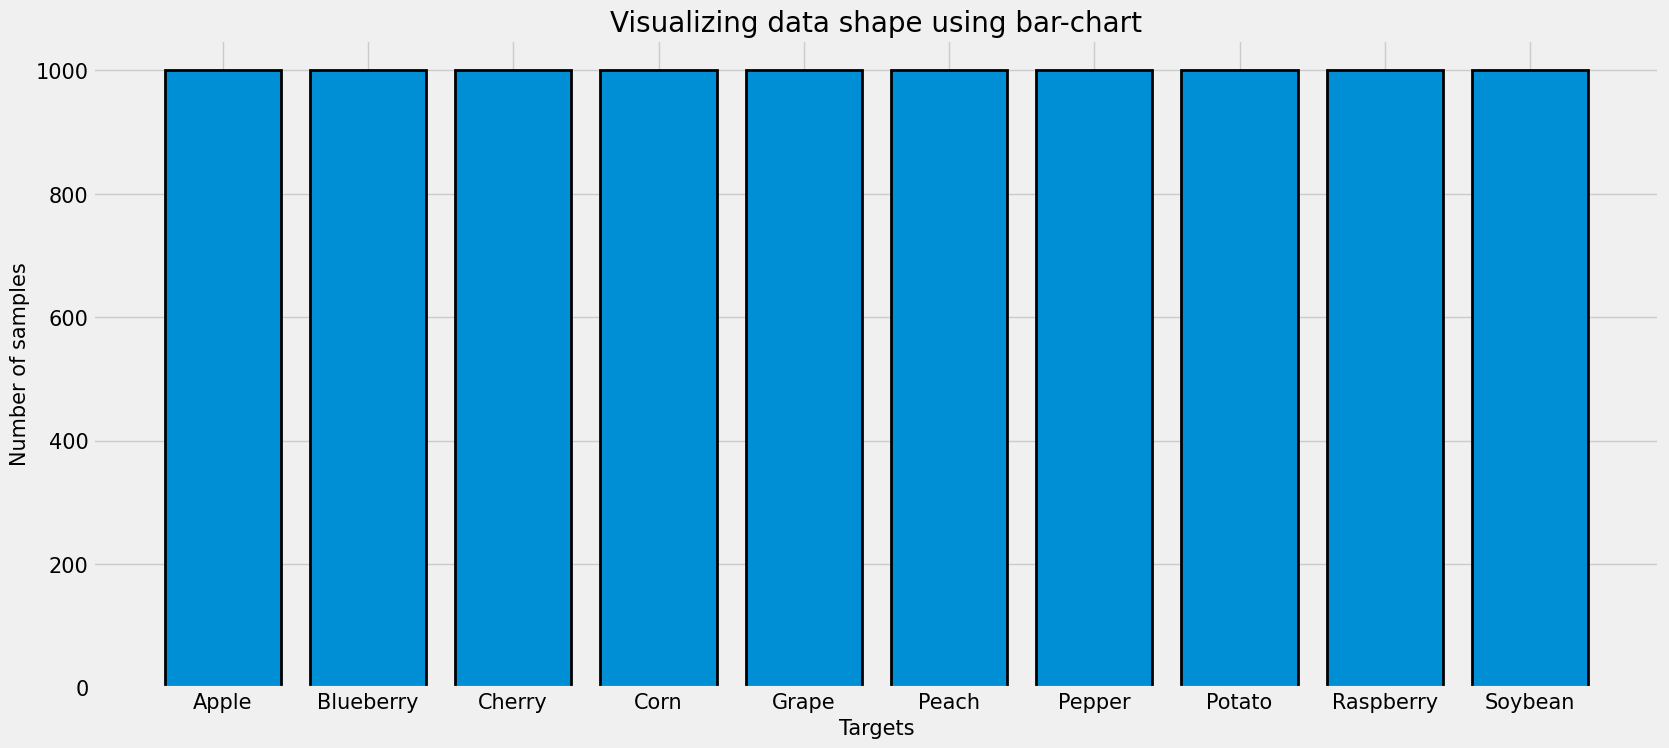

In [4]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18, 8))
    plt.bar(x=chart_labels,
           height=chart_data,
           edgecolor='black',
           linewidth=2)
    plt.title(label='Visualizing data shape using bar-chart', fontsize=20)
    plt.xlabel(xlabel='Targets', fontsize=15)
    plt.ylabel(ylabel='Number of samples', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

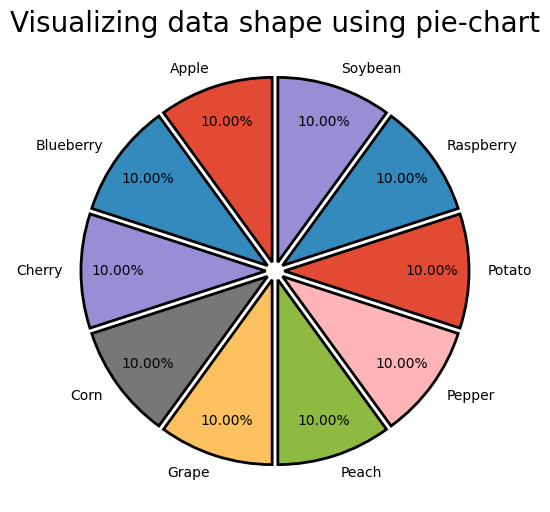

In [5]:
with plt.style.context(style='ggplot'):
    plt.figure(figsize=(6,6))
    plt.pie(labels=chart_labels,
            explode=[0.05]*len(class_labels),
            x=chart_data,
            autopct='%.2f%%',
            startangle=90,
            pctdistance=0.80, wedgeprops={'linewidth':2,'edgecolor':'black'})
    plt.title(label='Visualizing data shape using pie-chart', fontsize=20)
    plt.show()

In [6]:
X = []
y = []

for idx, label in enumerate(class_labels):
    path = os.path.join(base_dir, label)
    files = os.listdir(path)
    short_label = label.split("_")[0]
    print(f"Loading images from {short_label} target...")
    for sample in tqdm(iterable=files, desc=f'Loading {short_label} target images', total=len(files)):
        filepath = os.path.join(path, sample)
        try:
            image = cv2.imread(filepath)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (128, 128))
            image = image/255.0
            X.append(image)
            y.append(idx)
        except:
            continue

Loading images from Apple target...


Loading Apple target images: 100%|█████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.74it/s]


Loading images from Blueberry target...


Loading Blueberry target images: 100%|█████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.18it/s]


Loading images from Cherry target...


Loading Cherry target images: 100%|████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 31.12it/s]


Loading images from Corn target...


Loading Corn target images: 100%|██████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.32it/s]


Loading images from Grape target...


Loading Grape target images: 100%|█████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.04it/s]


Loading images from Peach target...


Loading Peach target images: 100%|█████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.07it/s]


Loading images from Pepper target...


Loading Pepper target images: 100%|████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 31.39it/s]


Loading images from Potato target...


Loading Potato target images: 100%|████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 31.19it/s]


Loading images from Raspberry target...


Loading Raspberry target images: 100%|█████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.89it/s]


Loading images from Soybean target...


Loading Soybean target images: 100%|███████████████████████████████████████████████| 1000/1000 [00:47<00:00, 21.20it/s]


In [7]:
X = np.array(X)
y = np.array(y)

print(X.shape,y.shape)

(10000, 128, 128, 3) (10000,)


In [8]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

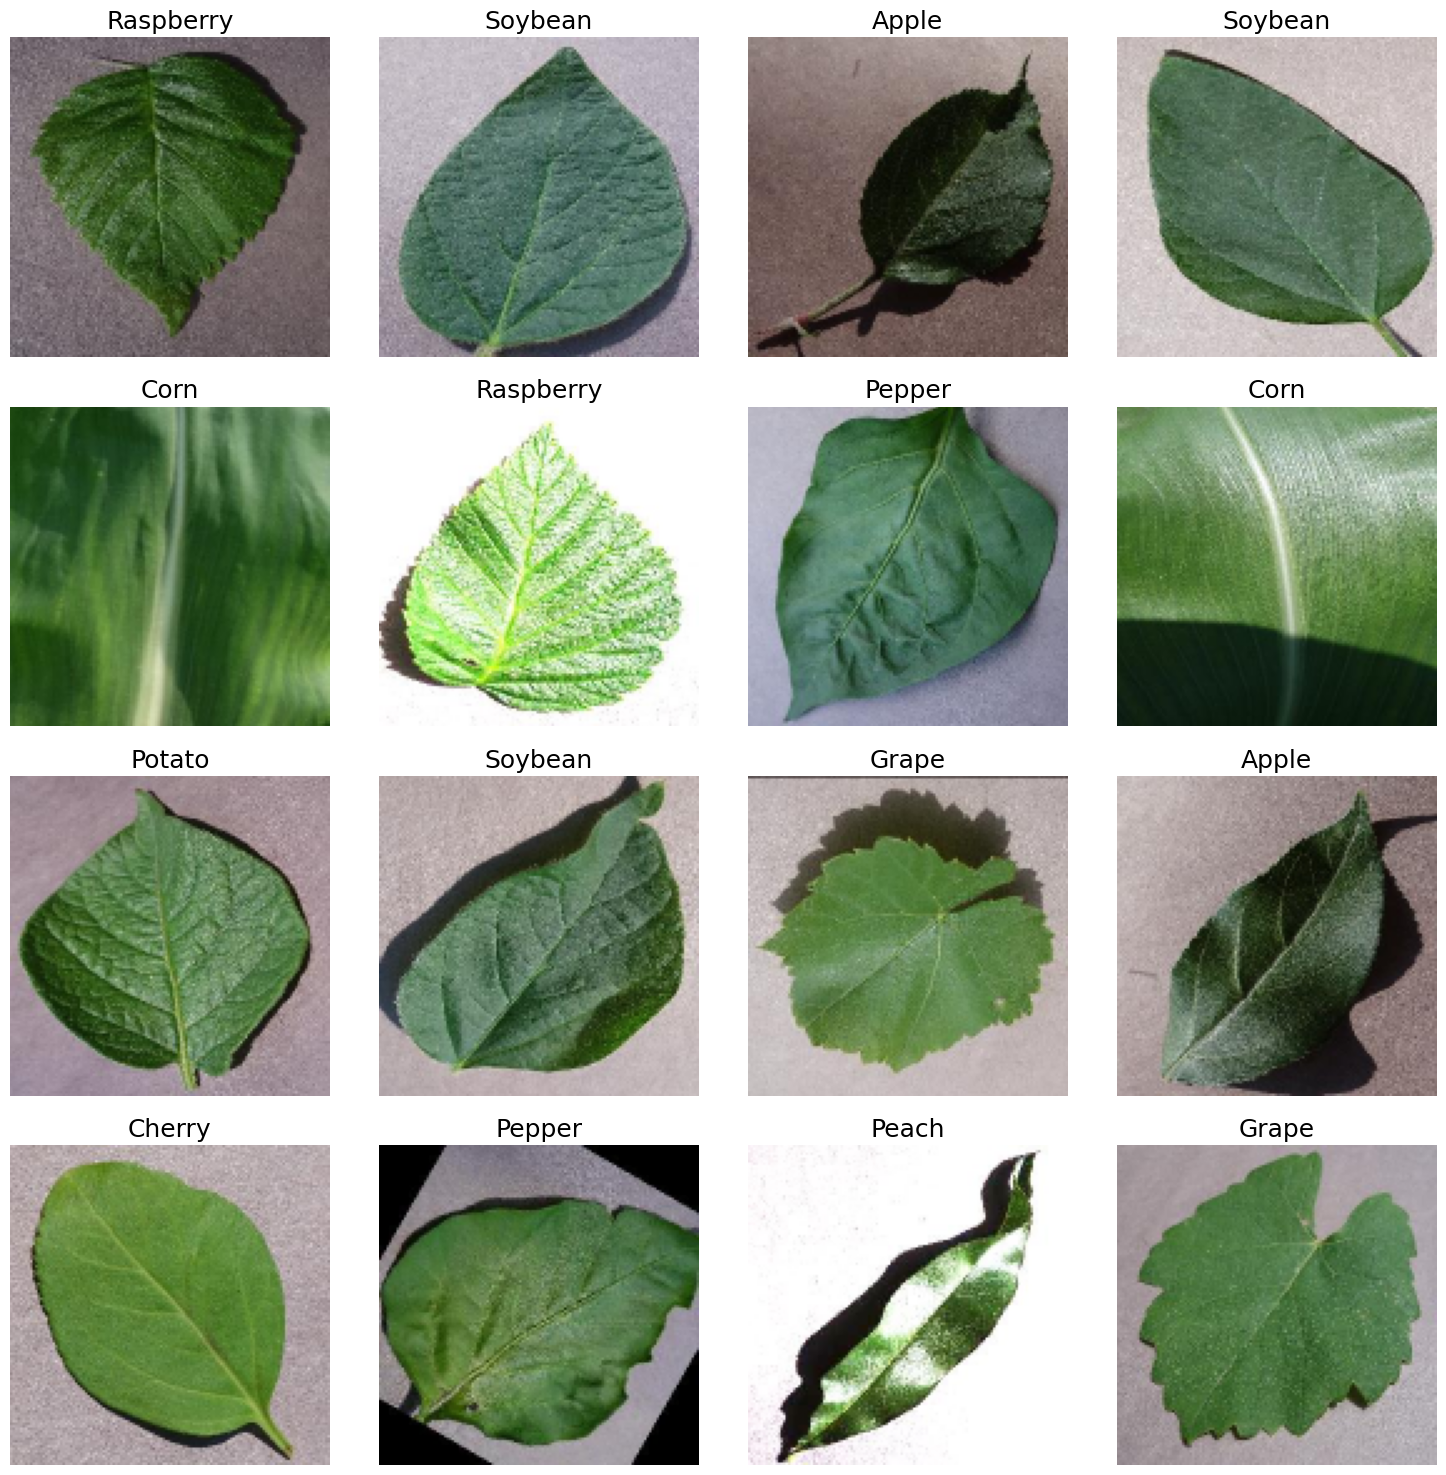

In [10]:
def show_images(images, labels, str_labels):
    plt.figure(figsize=(15,15))
    plt.rcParams['font.size'] = 15
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        idx = random.randint(0,len(images)-1)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(label=str_labels[labels[idx]].split("_")[0])
    plt.tight_layout()
    plt.show()
show_images(X, y, class_labels)

# Data Splitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 128, 128, 3) (2000, 128, 128, 3) (8000,) (2000,)


# Algorithm: CNN

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import L2
from tensorflow.keras.utils import to_categorical
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [18]:
cnn_model=Sequential()
cnn_model.add(Input((128, 128, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=32, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=128, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=128, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=256, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=256, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=512, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=512, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=1024, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=1024, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=2048, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=2048, kernel_size=3, strides=(1,1), padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())

cnn_model.add(GlobalAveragePooling2D())
cnn_model.add(Dense(units=len(class_labels), activation="softmax"))

In [19]:
cnn_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        3

***Model training***

In [20]:
history = cnn_model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[ReduceLROnPlateau(monitor='val_accuracy', patience=2, min_lr=0)]
)

Epoch 1/50
250/250 [==============================] - 61s 174ms/step - loss: 2.5885 - accuracy: 0.4475 - val_loss: 7.4798 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 2/50
250/250 [==============================] - 42s 167ms/step - loss: 1.8231 - accuracy: 0.6643 - val_loss: 4.3860 - val_accuracy: 0.2715 - lr: 0.0010
Epoch 3/50
250/250 [==============================] - 42s 169ms/step - loss: 1.5097 - accuracy: 0.7579 - val_loss: 5.1580 - val_accuracy: 0.3515 - lr: 0.0010
Epoch 4/50
250/250 [==============================] - 43s 172ms/step - loss: 2.1778 - accuracy: 0.6414 - val_loss: 325.1330 - val_accuracy: 0.1050 - lr: 0.0010
Epoch 5/50
250/250 [==============================] - 43s 172ms/step - loss: 2.1351 - accuracy: 0.6488 - val_loss: 44.2461 - val_accuracy: 0.1490 - lr: 0.0010
Epoch 6/50
250/250 [==============================] - 43s 172ms/step - loss: 1.7786 - accuracy: 0.6631 - val_loss: 2.1322 - val_accuracy: 0.5295 - lr: 1.0000e-04
Epoch 7/50
250/250 [=========================

***Accuracy and Loss plot-graphs***

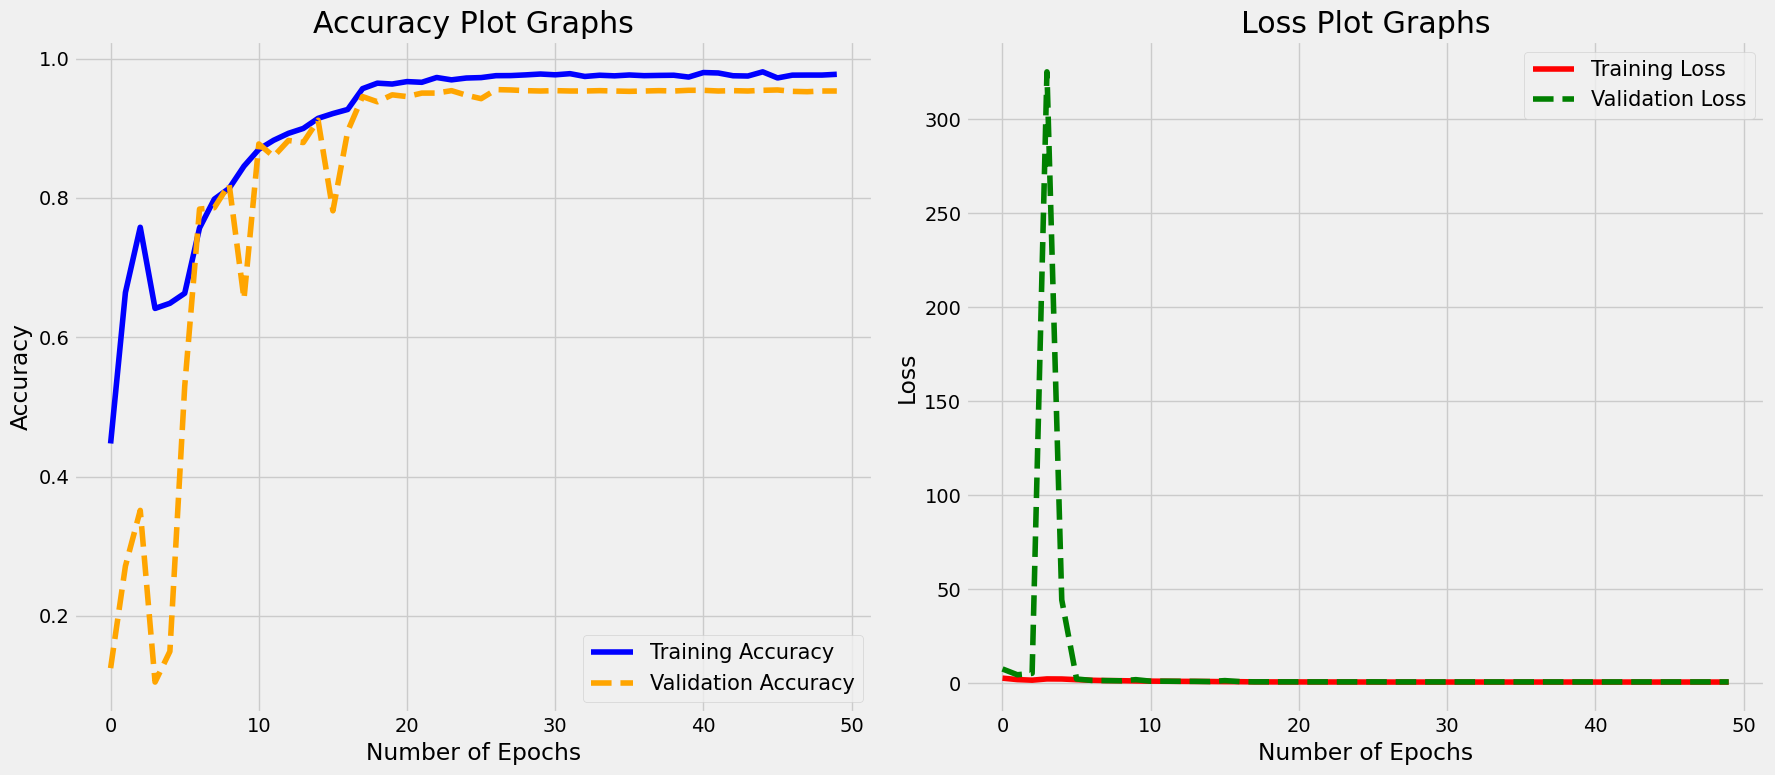

In [21]:
with plt.style.context(style='fivethirtyeight'):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharex=True)
    plt.rcParams['font.size'] = 15
    axes[0].plot(history.history["accuracy"], label="Training Accuracy", color='blue')
    axes[0].plot(history.history["val_accuracy"], label="Validation Accuracy", linestyle='dashed', color='orange')
    axes[0].set_title('Accuracy Plot Graphs')
    axes[0].set_xlabel('Number of Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    axes[1].plot(history.history["loss"], label="Training Loss", color='red')
    axes[1].plot(history.history["val_loss"], label="Validation Loss", linestyle='dashed', color='green')
    axes[1].set_title('Loss Plot Graphs')
    axes[1].set_xlabel('Number of Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    fig.tight_layout()
    plt.show()

In [22]:
model_prediction = cnn_model.predict(X_test, batch_size=32, verbose=1)

63/63 [==============================] - 3s 37ms/step


In [23]:
print(model_prediction)

[[2.11080646e-08 1.05262973e-13 1.17658928e-07 ... 3.49938972e-07
  1.25845689e-09 5.20741878e-06]
 [3.89184192e-04 1.31608967e-05 1.60434621e-09 ... 1.36883382e-05
  6.25881000e-07 7.77524320e-08]
 [6.65973630e-07 3.90557508e-12 1.72204515e-10 ... 5.53342943e-07
  3.13275144e-12 4.91720054e-10]
 ...
 [5.94921003e-05 6.99869361e-07 1.65091738e-01 ... 7.68435970e-02
  1.93034508e-03 7.48100698e-01]
 [9.99971032e-01 1.91356790e-07 1.90912827e-10 ... 1.39965596e-05
  3.14266102e-09 1.28047050e-05]
 [1.50874140e-08 4.92808756e-13 1.03299265e-10 ... 1.56005376e-06
  3.20595568e-12 9.99998331e-01]]


In [24]:
pred = np.argmax(model_prediction, axis=1)
actual = np.argmax(y_test, axis=1)

In [25]:
print(pred.tolist())

[4, 5, 3, 2, 2, 7, 5, 8, 1, 7, 8, 1, 6, 4, 0, 0, 6, 0, 7, 1, 0, 7, 1, 5, 7, 6, 2, 2, 7, 2, 7, 4, 2, 3, 0, 0, 6, 9, 4, 6, 6, 9, 1, 8, 8, 2, 3, 8, 7, 0, 4, 1, 5, 9, 5, 2, 9, 1, 9, 5, 1, 9, 2, 2, 0, 2, 4, 4, 2, 3, 9, 6, 9, 7, 2, 0, 5, 7, 9, 1, 9, 4, 4, 9, 1, 8, 6, 2, 7, 1, 1, 3, 2, 3, 6, 4, 7, 2, 1, 0, 5, 2, 2, 4, 0, 4, 8, 3, 1, 7, 5, 4, 4, 1, 0, 5, 3, 1, 2, 2, 7, 5, 7, 8, 9, 5, 2, 2, 8, 1, 6, 3, 4, 0, 7, 8, 2, 2, 6, 4, 3, 2, 7, 7, 1, 4, 7, 4, 5, 6, 8, 3, 3, 3, 1, 1, 2, 8, 8, 2, 1, 1, 5, 3, 8, 2, 8, 9, 7, 6, 3, 2, 1, 8, 6, 2, 5, 9, 9, 5, 1, 6, 9, 3, 0, 8, 0, 2, 6, 6, 6, 1, 4, 9, 8, 3, 6, 4, 9, 9, 9, 4, 3, 7, 9, 0, 0, 8, 4, 5, 0, 7, 4, 1, 8, 8, 2, 0, 5, 8, 6, 3, 5, 1, 6, 5, 7, 7, 8, 6, 3, 2, 7, 5, 1, 5, 0, 8, 4, 9, 9, 9, 8, 3, 3, 3, 8, 8, 5, 4, 1, 7, 5, 3, 0, 5, 6, 0, 0, 6, 5, 7, 5, 8, 9, 5, 4, 7, 9, 8, 0, 0, 7, 9, 2, 8, 7, 2, 7, 3, 2, 8, 1, 6, 5, 1, 7, 3, 7, 9, 3, 3, 5, 1, 2, 8, 8, 9, 0, 4, 0, 7, 9, 9, 1, 0, 7, 6, 8, 2, 2, 5, 9, 9, 5, 0, 6, 8, 7, 3, 8, 9, 1, 4, 4, 8, 6, 5, 5, 6, 0, 8, 8, 

In [26]:
print(actual.tolist())

[4, 5, 3, 2, 2, 7, 5, 8, 1, 7, 8, 1, 6, 4, 0, 0, 6, 0, 7, 1, 0, 7, 1, 5, 7, 6, 2, 2, 5, 2, 7, 4, 2, 3, 0, 0, 6, 9, 4, 6, 6, 9, 1, 8, 8, 2, 3, 6, 7, 0, 4, 1, 5, 9, 5, 2, 9, 1, 9, 5, 1, 9, 2, 2, 0, 2, 4, 4, 2, 3, 9, 6, 9, 7, 2, 0, 5, 7, 9, 1, 9, 4, 4, 9, 1, 8, 6, 2, 7, 1, 1, 3, 2, 3, 6, 4, 7, 2, 1, 0, 5, 2, 2, 4, 0, 4, 8, 3, 1, 7, 5, 4, 4, 1, 0, 5, 3, 1, 2, 2, 7, 5, 7, 8, 1, 5, 2, 2, 8, 1, 6, 3, 4, 0, 7, 8, 2, 2, 6, 4, 3, 2, 7, 7, 1, 4, 7, 4, 5, 6, 8, 3, 3, 3, 1, 1, 2, 8, 8, 2, 1, 1, 0, 3, 8, 2, 8, 9, 7, 8, 3, 2, 1, 8, 6, 2, 1, 9, 9, 5, 1, 9, 6, 3, 0, 8, 0, 2, 6, 1, 6, 1, 4, 9, 8, 3, 6, 4, 9, 9, 9, 4, 3, 7, 9, 0, 0, 6, 4, 5, 0, 7, 4, 1, 8, 8, 2, 0, 5, 8, 6, 3, 5, 1, 6, 5, 7, 7, 8, 6, 3, 2, 7, 5, 1, 5, 0, 8, 4, 9, 9, 9, 8, 3, 3, 3, 8, 7, 5, 4, 1, 7, 5, 3, 0, 5, 6, 0, 0, 6, 5, 7, 5, 8, 9, 5, 4, 7, 9, 8, 9, 0, 7, 9, 2, 8, 7, 9, 7, 3, 2, 8, 1, 6, 5, 1, 7, 3, 7, 9, 3, 3, 5, 1, 2, 8, 8, 9, 0, 4, 0, 7, 6, 9, 1, 0, 7, 6, 8, 2, 2, 5, 9, 9, 5, 0, 6, 8, 7, 3, 8, 9, 1, 4, 4, 8, 6, 5, 5, 6, 0, 8, 8, 

### Result Analysis

In [28]:
model_accuracy = accuracy_score(y_true=actual, y_pred=pred)
print(f"Validation accuracy of ConvolutionalNeuralNetwork mode: {model_accuracy*100.8:.2f}%")

Validation accuracy of ConvolutionalNeuralNetwork mode: 96.11%


***Classification Report***

In [29]:
print(classification_report(y_true=actual, y_pred=pred, target_names=[label.split("_")[0] for label in class_labels]))

              precision    recall  f1-score   support

       Apple       0.95      0.92      0.93       200
   Blueberry       0.96      0.93      0.94       200
      Cherry       0.98      0.99      0.99       200
        Corn       1.00      1.00      1.00       200
       Grape       0.98      0.98      0.98       200
       Peach       0.94      0.96      0.95       200
      Pepper       0.91      0.85      0.88       200
      Potato       0.95      0.98      0.96       200
   Raspberry       0.95      0.98      0.96       200
     Soybean       0.92      0.94      0.93       200

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



***Confusion Matrix***

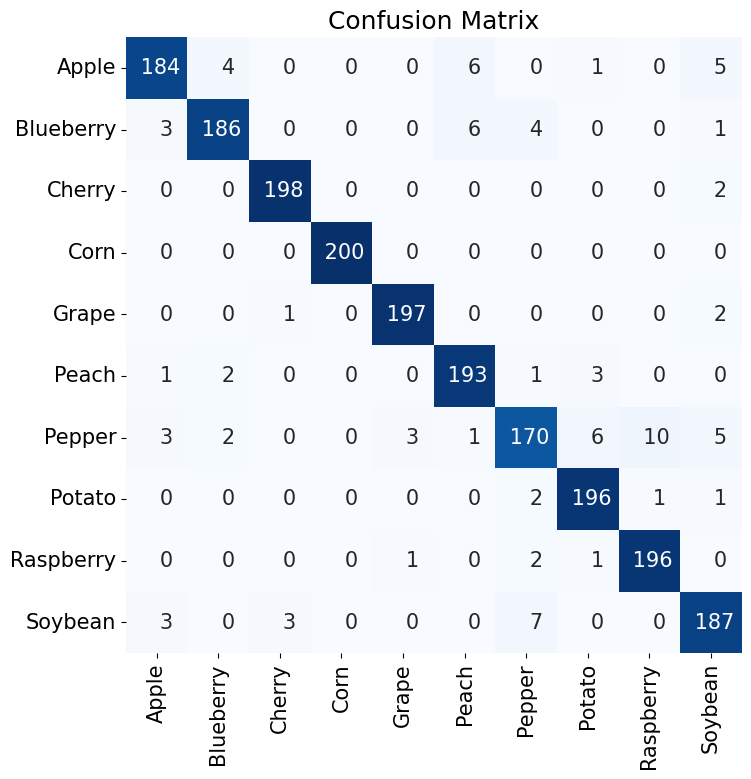

In [31]:
plt.rcParams['font.size'] = 15
plt.figure(figsize=(8, 8))
conf_matrix = confusion_matrix(y_true=actual, y_pred=pred)
ax = sns.heatmap(data=conf_matrix,
                 annot=True,
                 fmt='4d',
                 cbar=False,
                 xticklabels=[label.split("_")[0] for label in class_labels],
                 yticklabels=[label.split("_")[0] for label in class_labels],
                 cmap=plt.cm.Blues,
                 square=True)
plt.title('Confusion Matrix')
plt.show()

***model saving***

In [32]:
cnn_model.save("model/ConvolutionalNeuralNetwork_model.h5")

---